# Exercices Mongodb

### Exercice 1 : Dans cet exercice nous allons utiliser la librairie pymongo, pour créer une base de données dans mongodb avec python puis la questionner.

#### Importer les packages nécessaires : 

In [381]:
import pandas as pd
from pymongo import MongoClient
import pprint
import json

#### Charger le fichier csv 'crime_us.csv' contenant les données pour l'exercice dans un dataframe pandas :

In [382]:
df = pd.read_csv('crime_us.csv', index_col='Record ID')

In [383]:
df

City    State  Year      Month   V_Sex  V_Age   K_Sex  K_Age  \
Record ID                                                                       
402433      Anchorage   Alaska  2000    January  Female     25    Male     28   
402434      Anchorage   Alaska  2000    January  Female     31    Male     18   
402439      Anchorage   Alaska  2000      April    Male     32    Male     39   
402440      Anchorage   Alaska  2000        May    Male     30    Male     20   
402441      Anchorage   Alaska  2000       June    Male      2    Male     20   
...               ...      ...   ...        ...     ...    ...     ...    ...   
638449        Natrona  Wyoming  2014     August    Male     29    Male     67   
638451       Sheridan  Wyoming  2014       June    Male     62    Male     57   
638452       Sheridan  Wyoming  2014  September  Female      0  Female     22   
638453       Sublette  Wyoming  2014   December    Male     55    Male     31   
638454     Sweetwater  Wyoming  2014  September  Female      0  Female     24   

           Relationship        Weapon  
Record ID                              
402433             Wife       Handgun  
402434          Unknown       Handgun  
402439         Stranger         Rifle  
402440         Stranger       Handgun  
402441     Acquaintance  Blunt Object  
...                 ...           ...  
638449           Friend       Firearm  
638451     Acquaintance       Handgun  
638452         Daughter   Suffocation  
638453         Stranger         Knife  
638454         Daughter  Blunt Object  

[159814 rows x 10 columns]

##### Chaque ligne représente un enregistrement, pour récupérer chaque ligne sous forme de documents il faut transformer le dataframe en dictionnaire.

In [384]:
documents = df.to_dict(orient='Records')

In [385]:
documents

[{'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'January',
  'V_Sex': 'Female',
  'V_Age': 25,
  'K_Sex': 'Male',
  'K_Age': 28,
  'Relationship': 'Wife',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'January',
  'V_Sex': 'Female',
  'V_Age': 31,
  'K_Sex': 'Male',
  'K_Age': 18,
  'Relationship': 'Unknown',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'April',
  'V_Sex': 'Male',
  'V_Age': 32,
  'K_Sex': 'Male',
  'K_Age': 39,
  'Relationship': 'Stranger',
  'Weapon': 'Rifle'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'May',
  'V_Sex': 'Male',
  'V_Age': 30,
  'K_Sex': 'Male',
  'K_Age': 20,
  'Relationship': 'Stranger',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'June',
  'V_Sex': 'Male',
  'V_Age': 2,
  'K_Sex': 'Male',
  'K_Age': 20,
  'Relationship': 'Acquaintance',
  'Weapon': '

#### Créer une connexion avec mongoDB.

Utilisez MongoClient pour créer une connexion. MongoClient utilise par défaut l'instance
MongoDB s'exécutant sur localhost:27017 si elle n'est pas spécifiée.

In [386]:
client = MongoClient()

#### Accéder aux objets de base de données et de collection

La classe Database de PyMongo représente la construction de base de données dans MongoDB.
Les bases de données contiennent des groupes de collections liées de manière logique.
La classe Collection de PyMongo représente la construction de collection dans MongoDB. Les
collections contiennent des groupes de documents connexes.


Créez un connecteur vers une base de données que l'on appellera 'IPSSI' et une collection nommée 'crimeUS'

In [387]:
cursor = client['IPSSI']['crimeUS']

In [388]:
cursor = client.IPSSI.crimeUS

#### Inserer les données dans la base mongo.

In [389]:
documents

[{'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'January',
  'V_Sex': 'Female',
  'V_Age': 25,
  'K_Sex': 'Male',
  'K_Age': 28,
  'Relationship': 'Wife',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'January',
  'V_Sex': 'Female',
  'V_Age': 31,
  'K_Sex': 'Male',
  'K_Age': 18,
  'Relationship': 'Unknown',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'April',
  'V_Sex': 'Male',
  'V_Age': 32,
  'K_Sex': 'Male',
  'K_Age': 39,
  'Relationship': 'Stranger',
  'Weapon': 'Rifle'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'May',
  'V_Sex': 'Male',
  'V_Age': 30,
  'K_Sex': 'Male',
  'K_Age': 20,
  'Relationship': 'Stranger',
  'Weapon': 'Handgun'},
 {'City': 'Anchorage',
  'State': 'Alaska',
  'Year': 2000,
  'Month': 'June',
  'V_Sex': 'Male',
  'V_Age': 2,
  'K_Sex': 'Male',
  'K_Age': 20,
  'Relationship': 'Acquaintance',
  'Weapon': '

In [390]:
cursor.insert_many(documents)

InsertManyResult([ObjectId('65ae4f6f05e6407b4fa41a03'), ObjectId('65ae4f6f05e6407b4fa41a04'), ObjectId('65ae4f6f05e6407b4fa41a05'), ObjectId('65ae4f6f05e6407b4fa41a06'), ObjectId('65ae4f6f05e6407b4fa41a07'), ObjectId('65ae4f6f05e6407b4fa41a08'), ObjectId('65ae4f6f05e6407b4fa41a09'), ObjectId('65ae4f6f05e6407b4fa41a0a'), ObjectId('65ae4f6f05e6407b4fa41a0b'), ObjectId('65ae4f6f05e6407b4fa41a0c'), ObjectId('65ae4f6f05e6407b4fa41a0d'), ObjectId('65ae4f6f05e6407b4fa41a0e'), ObjectId('65ae4f6f05e6407b4fa41a0f'), ObjectId('65ae4f6f05e6407b4fa41a10'), ObjectId('65ae4f6f05e6407b4fa41a11'), ObjectId('65ae4f6f05e6407b4fa41a12'), ObjectId('65ae4f6f05e6407b4fa41a13'), ObjectId('65ae4f6f05e6407b4fa41a14'), ObjectId('65ae4f6f05e6407b4fa41a15'), ObjectId('65ae4f6f05e6407b4fa41a16'), ObjectId('65ae4f6f05e6407b4fa41a17'), ObjectId('65ae4f6f05e6407b4fa41a18'), ObjectId('65ae4f6f05e6407b4fa41a19'), ObjectId('65ae4f6f05e6407b4fa41a1a'), ObjectId('65ae4f6f05e6407b4fa41a1b'), ObjectId('65ae4f6f05e6407b4fa41a

#### Interroger la base de données :

Chaque documents dans la bas de donnée représente un crime commis aux US entre 2000 et 2014. \
Repondez aux questions suivante en interrogeant la base de données.

Combien de crimes ont été commis au total?

In [391]:
cursor.estimated_document_count()

159814

Combien de crimes ont été commis en 2010?

In [392]:
cursor.count_documents({'Year': 2010})

10420

Combien de crimes ont été commis au Texas par des hommes?

In [393]:
cursor.count_documents({'State': 'Texas', 'K_Sex': 'Male'})

14182

Trouvez les documents correspondants aux crimes commis par des femmes en Californie en 2005.

In [394]:
cursor.count_documents({'State': 'California', 'K_Sex': 'Female'})

1490

Combien y'a t'il de type d'armes différents et quels sont ils? Combien de crimes par arme du crime ? Faire un graphique en barre.

In [395]:
weapons = cursor.distinct("Weapon")
print(len(weapons))
print(weapons)

16
['Blunt Object', 'Drowning', 'Drugs', 'Explosives', 'Fall', 'Fire', 'Firearm', 'Gun', 'Handgun', 'Knife', 'Poison', 'Rifle', 'Shotgun', 'Strangulation', 'Suffocation', 'Unknown']


In [396]:
for weapon in weapons:
    count = cursor.count_documents({"Weapon": weapon})
    print(count, "crimes par", weapon)

19452 crimes par Blunt Object
188 crimes par Drowning
706 crimes par Drugs
60 crimes par Explosives
39 crimes par Fall
1174 crimes par Fire
14984 crimes par Firearm
868 crimes par Gun
74973 crimes par Handgun
23996 crimes par Knife
151 crimes par Poison
5194 crimes par Rifle
5902 crimes par Shotgun
1268 crimes par Strangulation
1247 crimes par Suffocation
9612 crimes par Unknown


In [397]:
nbCrimes = [cursor.count_documents({"Weapon": weapon}) for weapon in weapons]
print(nbCrimes)

[19452, 188, 706, 60, 39, 1174, 14984, 868, 74973, 23996, 151, 5194, 5902, 1268, 1247, 9612]


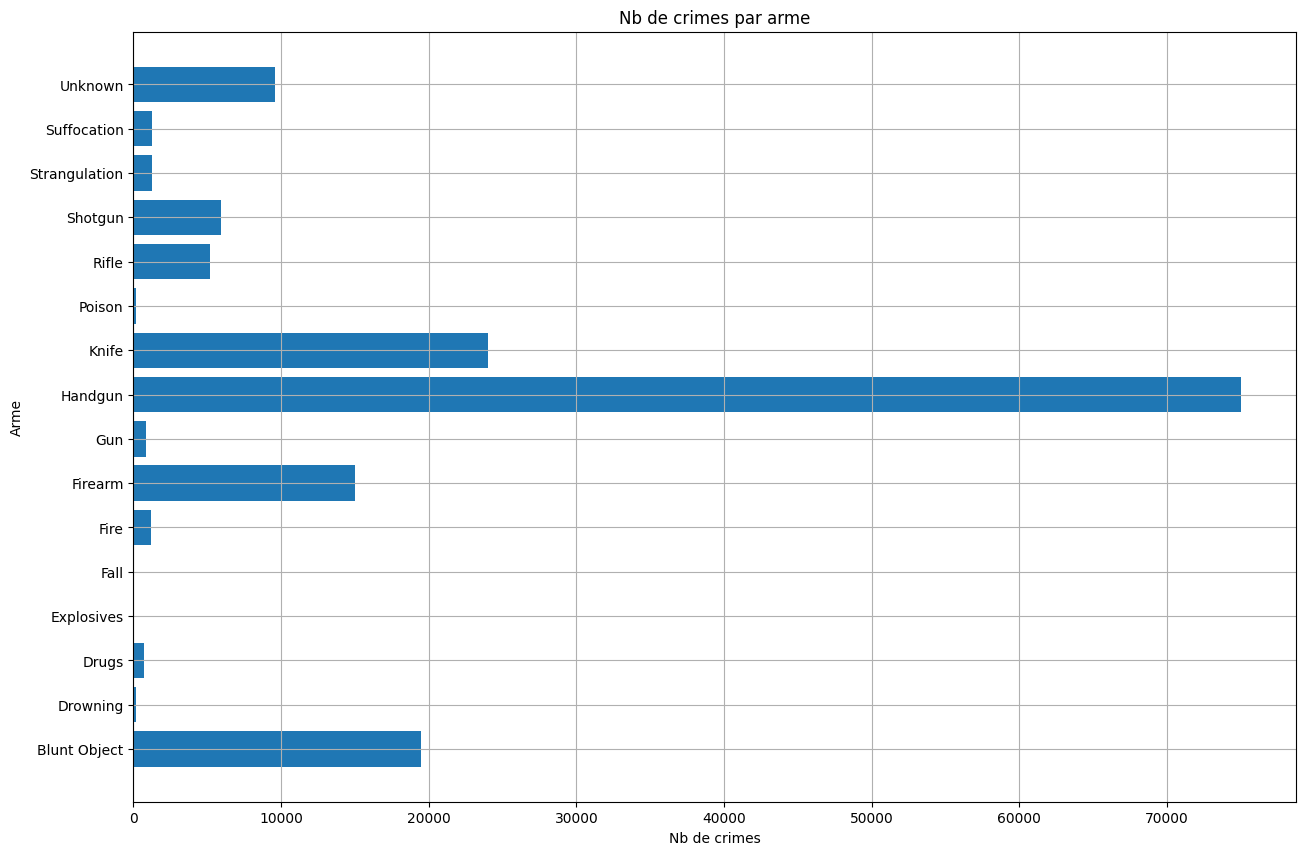

In [398]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.barh(weapons, nbCrimes)
plt.xlabel('Nb de crimes')
plt.ylabel('Arme')
plt.title('Nb de crimes par arme')
plt.grid(True)
plt.show()

Combien de crimes ont été commis sur des personnes de plus de 50 ans?

In [399]:
cursor.count_documents({"V_Age": {"$gte": 50}})

27477

Combien de crime ont été commis par empoisonnement entre 2007 et 2010 ?

In [400]:
cursor.count_documents({"Weapon": "Poison", "Year": {"$gte": 2007, "$lte": 2010}})

33

### Exercice 2 : Cette fois nous allons travailler avec des données concernant les bibliothèques de France, le fichier d'origine est un json.

Chargez le fichier JSON 'repertoire-bibliotheques.json' dans votre base de données 'IPSSI' dans une nouvelle collection appelée 'bibliotheques'.

In [401]:
client = MongoClient("mongodb://localhost:27017/")
db = client["IPSSI"]
collection_name = "bibliotheques"

with open('repertoire-bibliotheques.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

collection = db[collection_name]
collection.insert_many(data)


InsertManyResult([ObjectId('65ae4f7505e6407b4fa68a4a'), ObjectId('65ae4f7505e6407b4fa68a4b'), ObjectId('65ae4f7505e6407b4fa68a4c'), ObjectId('65ae4f7505e6407b4fa68a4d'), ObjectId('65ae4f7505e6407b4fa68a4e'), ObjectId('65ae4f7505e6407b4fa68a4f'), ObjectId('65ae4f7505e6407b4fa68a50'), ObjectId('65ae4f7505e6407b4fa68a51'), ObjectId('65ae4f7505e6407b4fa68a52'), ObjectId('65ae4f7505e6407b4fa68a53'), ObjectId('65ae4f7505e6407b4fa68a54'), ObjectId('65ae4f7505e6407b4fa68a55'), ObjectId('65ae4f7505e6407b4fa68a56'), ObjectId('65ae4f7505e6407b4fa68a57'), ObjectId('65ae4f7505e6407b4fa68a58'), ObjectId('65ae4f7505e6407b4fa68a59'), ObjectId('65ae4f7505e6407b4fa68a5a'), ObjectId('65ae4f7505e6407b4fa68a5b'), ObjectId('65ae4f7505e6407b4fa68a5c'), ObjectId('65ae4f7505e6407b4fa68a5d'), ObjectId('65ae4f7505e6407b4fa68a5e'), ObjectId('65ae4f7505e6407b4fa68a5f'), ObjectId('65ae4f7505e6407b4fa68a60'), ObjectId('65ae4f7505e6407b4fa68a61'), ObjectId('65ae4f7505e6407b4fa68a62'), ObjectId('65ae4f7505e6407b4fa68a

Combien de bibliotheques se trouvent à Paris?

In [402]:
cursor = client['IPSSI']['bibliotheques']

In [403]:
cursor.count_documents({'fields.commune': 'paris'})

10

Faire un update sur le champs "commune" pour que toutes les noms de commune soit écrits avec une majuscule.
Refaire le compte des biblothèques à paris.

In [404]:
collection.update_many({"fields.commune": "paris"}, {"$set": {"fields.commune": "Paris"}})

UpdateResult({'n': 10, 'nModified': 10, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [406]:
cursor.count_documents({'fields.commune': 'Paris'})

615

Affichez tous les noms d'établissements situé dans le 95.

In [409]:
libraries = cursor.find({"fields.codepostal": {"$regex": "^95"}})

for library in libraries:
    print(library["fields"]["nometablissement"])

Médiathèque de l'Horloge
Bibliothèque municipale
Médiathèque municipale
Ecole nationale supérieure d'arts de Paris-Cergy. Centre de documentation
Val-d'Oise
Val-d'Oise
Réseau des médiathèques intercommunales du Val Parisis, Val d'Oise
Médiathèque  Elsa-Triolet et Louis-Aragon
Bibliothèque Albert Camus
Ecole supérieure des sciences économiques et commerciales. Learning Center
Bibliothèque d'Etude et d'Information
Musée François Mauriac
Université de Cergy-Pontoise. Bibliothèque universitaire. Site de Cergy-Hirsch
Ecole nationale supérieure de l'électronique et de ses applications. Centre de documentation
Bibliothèque Georges Duhamel
Médiathèque de Jouy le Moutier
Université de Cergy-Pontoise
Bibliothèque départementale du Val d'Oise
Bibliothèque municipale Georges Brassens
Bibliothèque Aimé Césaire
Médiathèque municipale François Mauriac
Médiathèque municipale
Bibliothèque intercommunale  Anna-Langfus. Sarcelles
Université de Cergy-Pontoise
Université de Cergy-Pontoise
Bibliothèque musi

Requêtez la bdd pour créer un dictionnaire comportant le nombre de bibliothèques ouvertes par jour de la semaine.

In [417]:
jourSemaine = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
ouvertureParJour = {}
for jour in jourSemaine :
    casseJour = f'(?i){jour}'
    ouvertureParJour[jour] = cursor.count_documents({"fields.heuresouverture":{'$regex': casseJour }})

ouvertureParJour

{'lundi': 624,
 'mardi': 493,
 'mercredi': 442,
 'jeudi': 394,
 'vendredi': 839,
 'samedi': 447,
 'dimanche': 70}